In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import rankdata
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind

sns.set(style="whitegrid")

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#first will be working on transcriptomics dataset

#Step 1: Loading the data and mapping it with meta-data provided
input_path = "/content/drive/MyDrive/GSE48350_Input.xlsx"
meta_path = "/content/drive/MyDrive/GSE48350_METADATA.csv"

input_data = pd.read_excel(input_path)
meta_data = pd.read_csv(meta_path)

In [ ]:
len(input_data)

20864

In [ ]:
input_data.head(5)

probeId geneName         S1         S2         S3         S4  \
0     224372_at      ND4  14.447004  14.488466  14.359237  14.447004   
1  1553570_x_at     COX2  14.342658  14.319904  14.301045  14.311038   
2  1553567_s_at     ATP6  14.274753  14.535888  14.169766  14.355387   
3  1553538_s_at     COX1  14.131576  14.201428  14.109259  14.207664   
4   211296_x_at      UBC  13.724726  13.681150  13.887249  13.771470   

          S5         S6         S7         S8  ...       S244       S245  \
0  14.371623  14.309105  14.463468  14.371623  ...  14.431147  14.471096   
1  14.278164  14.181809  14.369584  14.274293  ...  14.274278  14.387093   
2  14.137347  14.125699  14.493597  14.127482  ...  14.276798  14.307191   
3  14.102998  13.971966  14.338718  13.936151  ...  14.066920  14.196323   
4  13.966789  14.064666  13.583540  13.836327  ...  13.911063  13.706277   

        S246       S247       S248       S249       S250       S251  \
0  14.476100  14.405654  14.338739  14.477873  14.468459  14.514001   
1  14.395561  14.318622  14.066148  14.314094  14.201326  14.315090   
2  14.399148  14.362724  13.931964  14.291478  14.155846  14.345779   
3  14.213274  14.180875  13.870975  14.208501  13.761009  14.111776   
4  13.640640  13.752444  13.908008  13.948781  13.868106  13.796900   

        S252       S253  
0  14.280931  14.481236  
1  14.140118  14.340537  
2  13.952049  14.342045  
3  13.828361  14.041684  
4  14.052307  13.885401  

[5 rows x 255 columns]

In [ ]:
meta_data

accession sampleId                                      title  \
0     GSM300166       S1      PostcentralGyrus_female_91yrs_indiv10   
1     GSM300167       S2  SuperiorFrontalGyrus_female_91yrs_indiv10   
2     GSM300168       S3          Hippocampus_female_96yrs_indiv105   
3     GSM300169       S4            Hippocampus_male_82yrs_indiv106   
4     GSM300170       S5            Hippocampus_male_84yrs_indiv108   
..          ...      ...                                        ...   
248  GSM1176271     S249       superior frontal gyrus_male_85_AD_74   
249  GSM1176272     S250       superior frontal gyrus_male_86_AD_92   
250  GSM1176273     S251       superior frontal gyrus_male_94_AD_44   
251  GSM1176274     S252        superior frontal gyrus_male_94_AD_5   
252  GSM1176275     S253       superior frontal gyrus_male_94_AD_90   

                                          sourceName  gender  age  groupI  \
0         brain, postcentral gyrus, female, 91 years       1   91       0   
1    brain, superior frontal gyrus, female, 91 years       1   91       0   
2               brain, hippocampus, female, 96 years       1   96       0   
3                 brain, hippocampus, male, 82 years       0   82       0   
4                 brain, hippocampus, male, 84 years       0   84       0   
..                                               ...     ...  ...     ...   
248                   superior frontal gyrus_male_AD       0   85       1   
249                   superior frontal gyrus_male_AD       0   86       1   
250                   superior frontal gyrus_male_AD       0   94       1   
251                   superior frontal gyrus_male_AD       0   94       1   
252                   superior frontal gyrus_male_AD       0   94       1   

     groupII  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
..       ...  
248      NaN  
249      NaN  
250      NaN  
251      NaN  
252      NaN  

[253 rows x 8 columns]

In [ ]:
meta_data['gender'] = meta_data['gender'].replace({1: "Female" , 0:"Male"})
meta_data

accession sampleId                                      title  \
0     GSM300166       S1      PostcentralGyrus_female_91yrs_indiv10   
1     GSM300167       S2  SuperiorFrontalGyrus_female_91yrs_indiv10   
2     GSM300168       S3          Hippocampus_female_96yrs_indiv105   
3     GSM300169       S4            Hippocampus_male_82yrs_indiv106   
4     GSM300170       S5            Hippocampus_male_84yrs_indiv108   
..          ...      ...                                        ...   
248  GSM1176271     S249       superior frontal gyrus_male_85_AD_74   
249  GSM1176272     S250       superior frontal gyrus_male_86_AD_92   
250  GSM1176273     S251       superior frontal gyrus_male_94_AD_44   
251  GSM1176274     S252        superior frontal gyrus_male_94_AD_5   
252  GSM1176275     S253       superior frontal gyrus_male_94_AD_90   

                                          sourceName  gender  age  groupI  \
0         brain, postcentral gyrus, female, 91 years  Female   91       0   
1    brain, superior frontal gyrus, female, 91 years  Female   91       0   
2               brain, hippocampus, female, 96 years  Female   96       0   
3                 brain, hippocampus, male, 82 years    Male   82       0   
4                 brain, hippocampus, male, 84 years    Male   84       0   
..                                               ...     ...  ...     ...   
248                   superior frontal gyrus_male_AD    Male   85       1   
249                   superior frontal gyrus_male_AD    Male   86       1   
250                   superior frontal gyrus_male_AD    Male   94       1   
251                   superior frontal gyrus_male_AD    Male   94       1   
252                   superior frontal gyrus_male_AD    Male   94       1   

     groupII  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
..       ...  
248      NaN  
249      NaN  
250      NaN  
251      NaN  
252      NaN  

[253 rows x 8 columns]

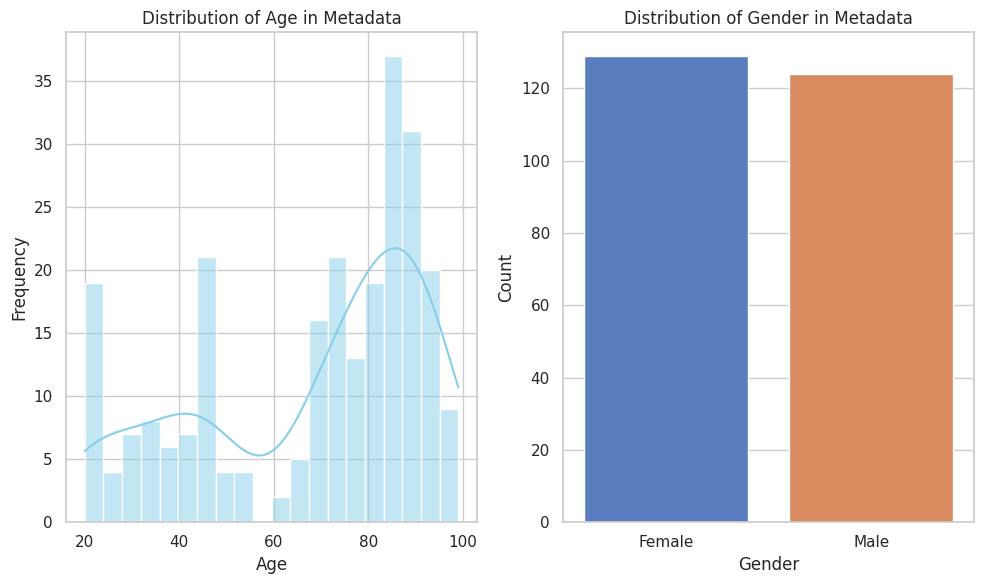

In [ ]:
#visualizing meta data parameters
fig,axes = plt.subplots(nrows = 1 , ncols = 2 , figsize=(10, 6))
sns.histplot(meta_data['age'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Age in Metadata')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.countplot(x='gender', data=meta_data,hue = 'gender', palette='muted', ax=axes[1], legend = False)
axes[1].set_title('Distribution of Gender in Metadata')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

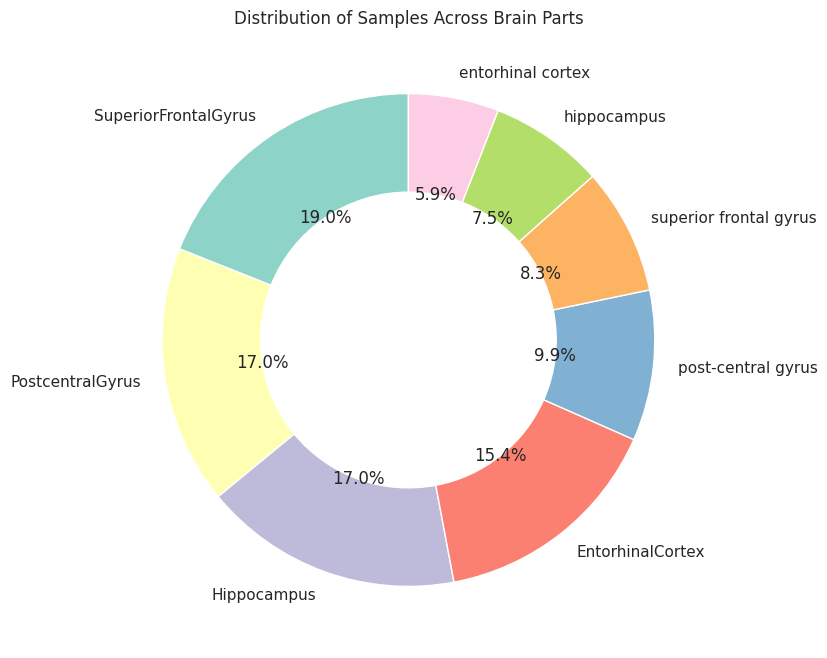

In [ ]:
meta_data['BrainPart'] = meta_data['title'].str.split('_').str[0]
colors = sns.color_palette('Set3')

plt.figure(figsize=(8, 8))
meta_data['BrainPart'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors = colors)
plt.title('Distribution of Samples Across Brain Parts')
plt.ylabel('')
plt.show()

In [ ]:
#so null values present is about 0
input_data.isna().sum().sum()

0

In [ ]:
#samplewise statistics for gene expression
input_data.iloc[:, 2:].describe()

S1            S2            S3            S4            S5  \
count  20864.000000  20864.000000  20864.000000  20864.000000  20864.000000   
mean       7.061505      7.054983      7.158433      7.143819      7.175469   
std        1.986019      2.074754      2.191410      2.175094      2.185897   
min        2.601400      2.511169      2.571582      2.533201      2.642374   
25%        5.627906      5.503188      5.426618      5.418725      5.443349   
50%        7.097146      7.107562      7.298417      7.291943      7.338545   
75%        8.411394      8.494131      8.768633      8.733004      8.791855   
max       14.447004     14.535888     14.359237     14.447004     14.371623   

                 S6            S7            S8            S9           S10  \
count  20864.000000  20864.000000  20864.000000  20864.000000  20864.000000   
mean       7.158614      7.141604      7.094556      7.094673      7.112572   
std        2.208824      2.116999      2.092177      2.102850      2.157434   
min        2.592310      2.553248      2.627890      2.656758      2.599718   
25%        5.394231      5.535834      5.509985      5.505990      5.453477   
50%        7.302353      7.257750      7.100293      7.122195      7.145035   
75%        8.786722      8.660637      8.588185      8.590035      8.700238   
max       14.309105     14.493597     14.371623     14.427704     14.357347   

       ...          S244          S245          S246          S247  \
count  ...  20864.000000  20864.000000  20864.000000  20864.000000   
mean   ...      7.057314      7.069867      7.080079      7.073191   
std    ...      2.102562      2.055757      2.000659      2.086464   
min    ...      2.635926      2.553818      2.547131      2.648053   
25%    ...      5.474189      5.541585      5.610209      5.492914   
50%    ...      7.083825      7.123151      7.171118      7.108496   
75%    ...      8.526212      8.501231      8.469097      8.553806   
max    ...     14.431147     14.471096     14.476100     14.405654   

               S248          S249          S250          S251          S252  \
count  20864.000000  20864.000000  20864.000000  20864.000000  20864.000000   
mean       7.089574      7.070415      7.099131      7.073889      7.133582   
std        2.112274      2.091469      2.192518      2.087978      2.130744   
min        2.589585      2.608592      2.602776      2.621608      2.623299   
25%        5.476180      5.495926      5.346706      5.509484      5.472229   
50%        7.126421      7.100175      7.193195      7.125431      7.220708   
75%        8.582102      8.531374      8.721541      8.529463      8.659465   
max       14.338739     14.477873     14.468459     14.514001     14.280931   

               S253  
count  20864.000000  
mean       7.084061  
std        2.093943  
min        2.614083  
25%        5.515369  
50%        7.138803  
75%        8.558936  
max       14.481236  

[8 rows x 253 columns]

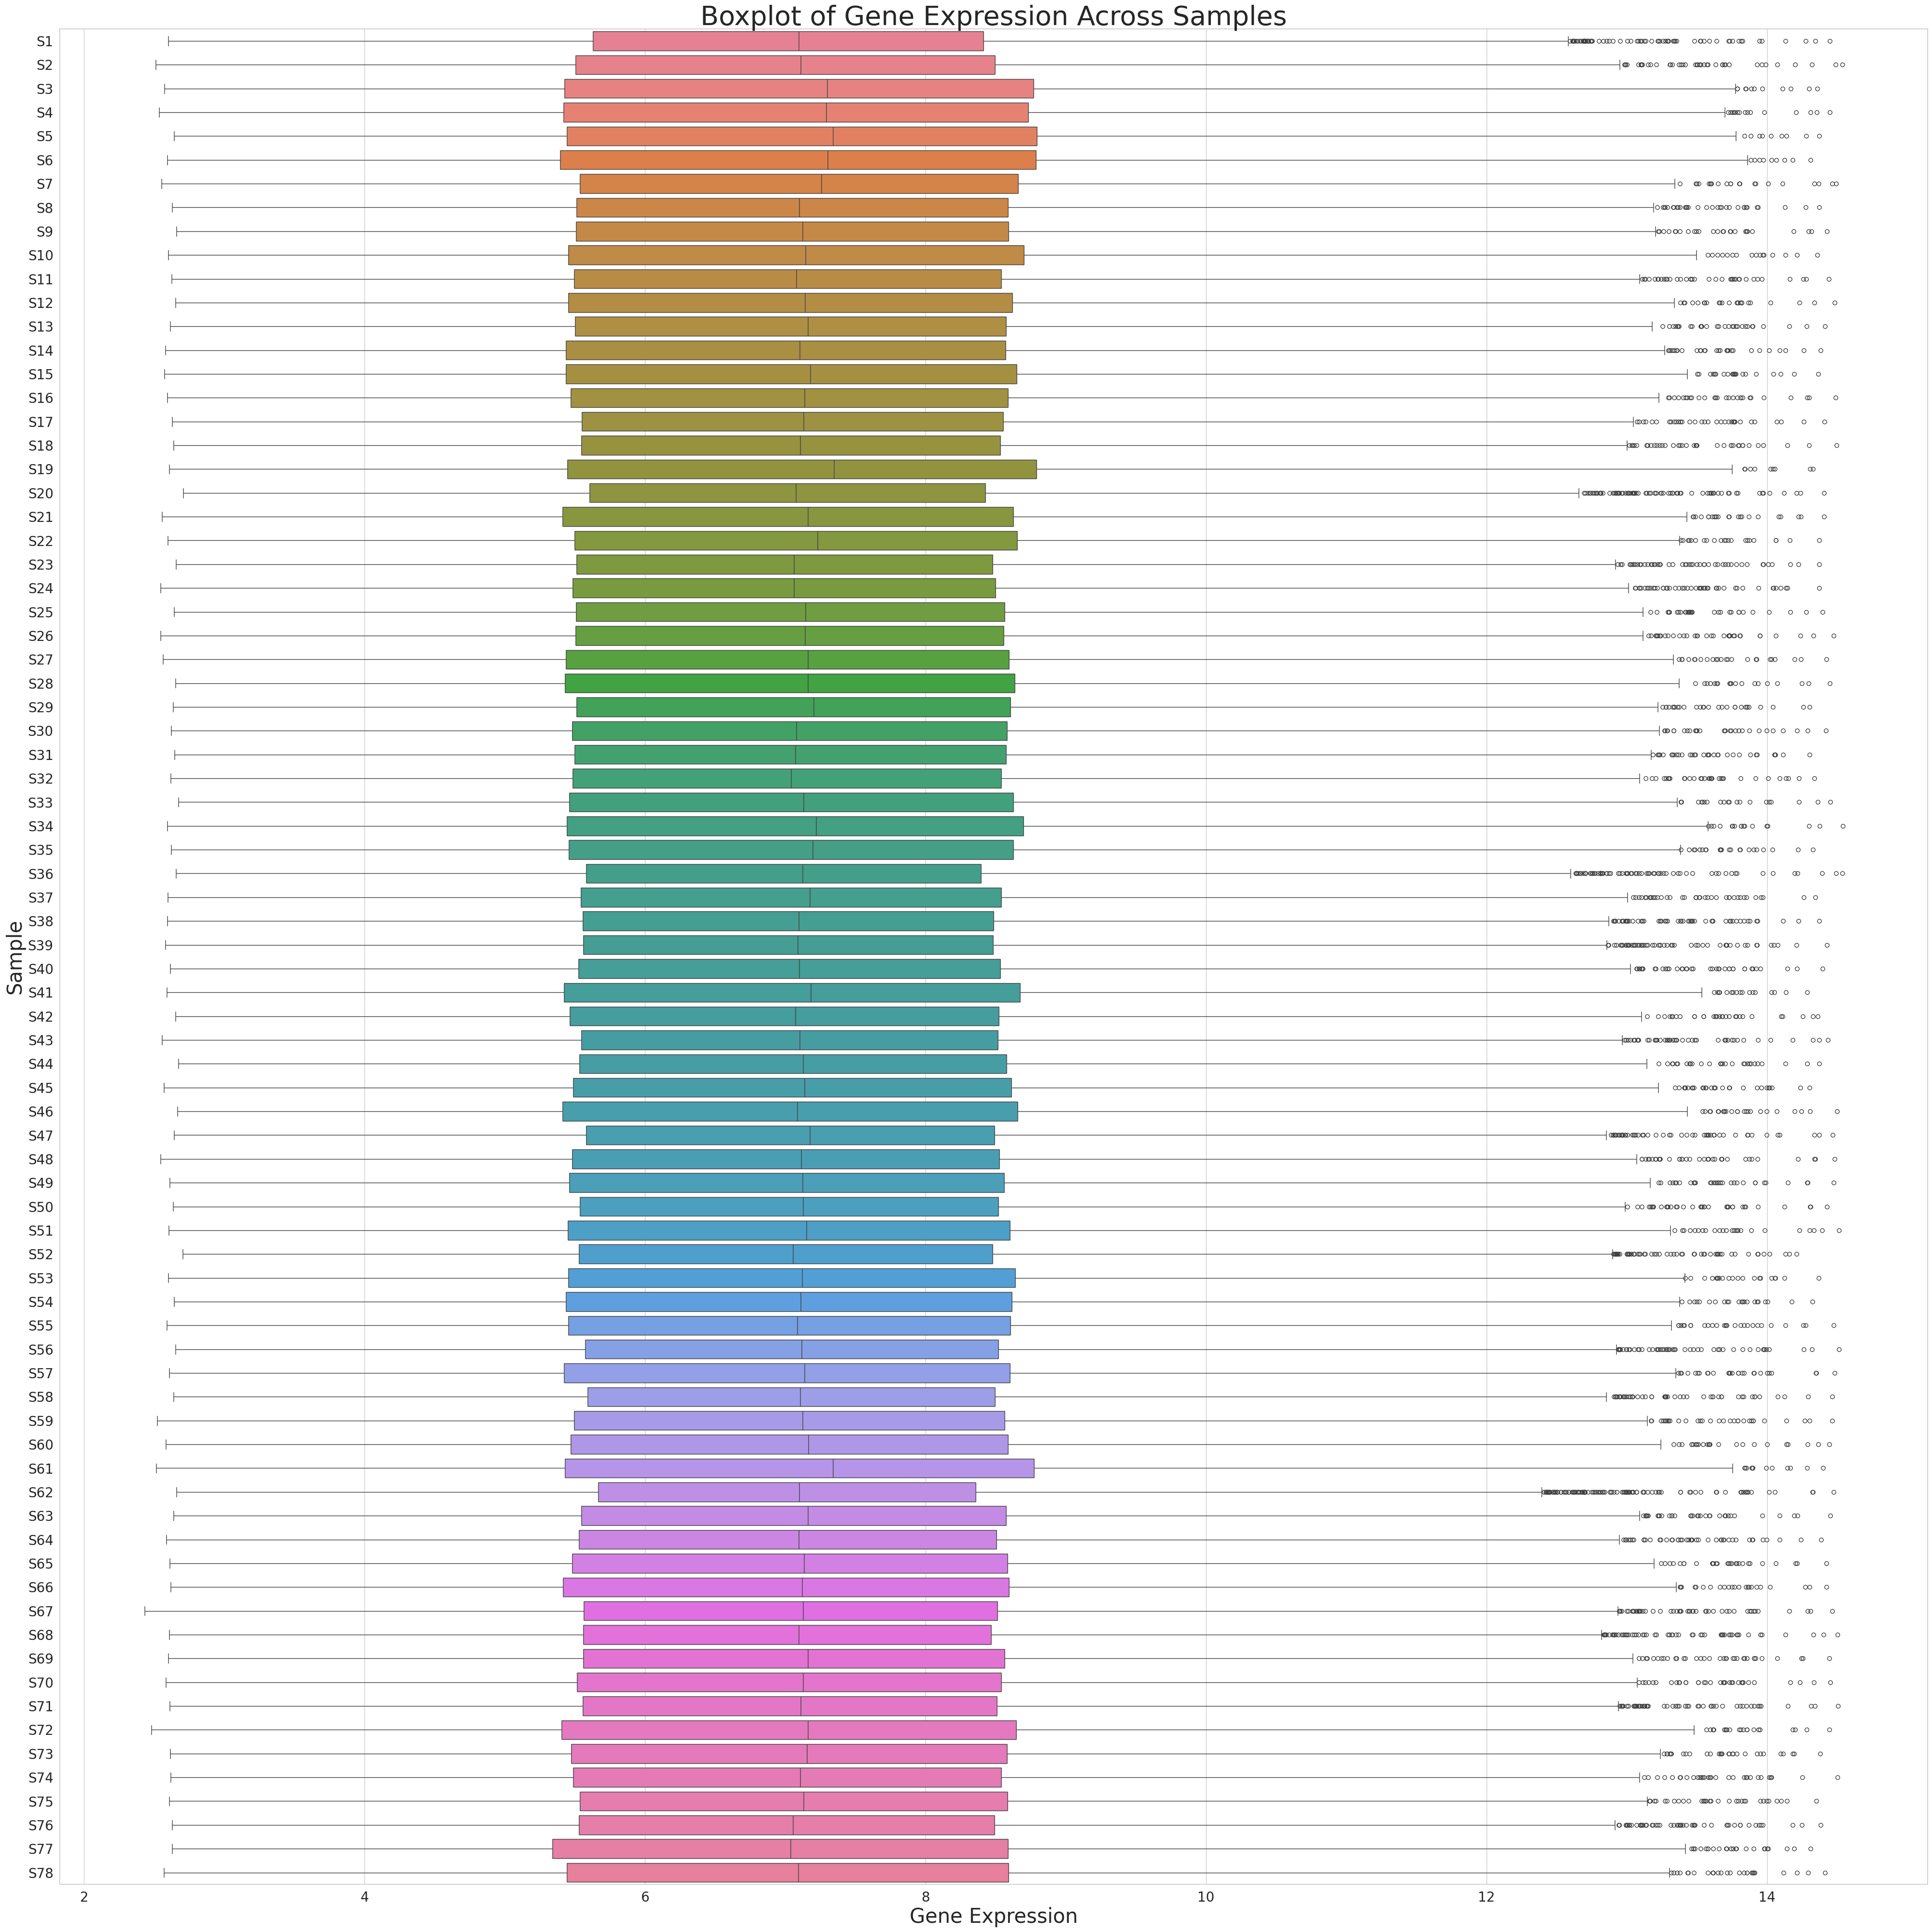

In [ ]:
#samplewise boxplot of gene expression for first 80 samples
plt.figure(figsize=(50, 50))
sns.boxplot(data=input_data.iloc[:, 2:80], orient='h')  # 'h' for horizontal orientation
plt.title('Boxplot of Gene Expression Across Samples',fontsize = 40)
plt.xlabel('Gene Expression', fontsize = 30)
plt.ylabel('Sample',fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

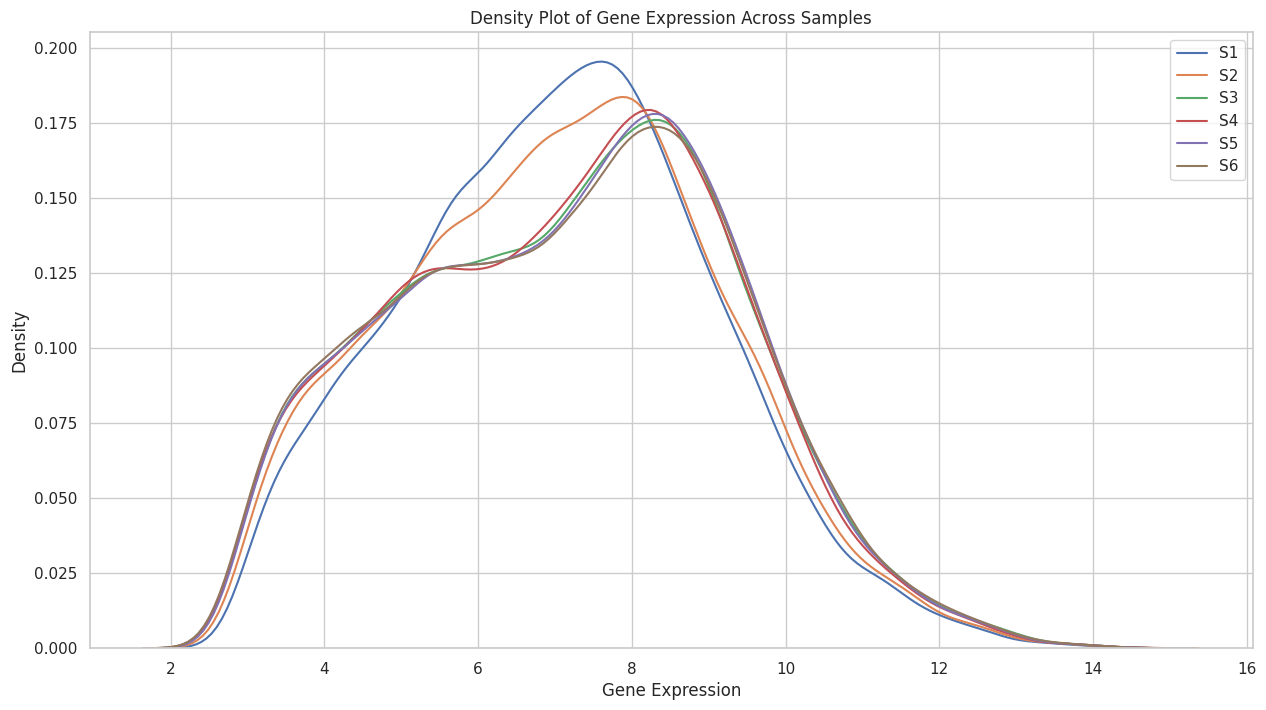

In [ ]:
# Creation of a density plot for each sample
plt.figure(figsize=(15, 8))

# Loopping through each sample and plot the density
for sample_id in input_data.columns[2:8]:
    sns.kdeplot(input_data[sample_id], label=sample_id)

# Setting plot labels and title
plt.title('Density Plot of Gene Expression Across Samples')
plt.xlabel('Gene Expression')
plt.ylabel('Density')
plt.legend()

plt.show()

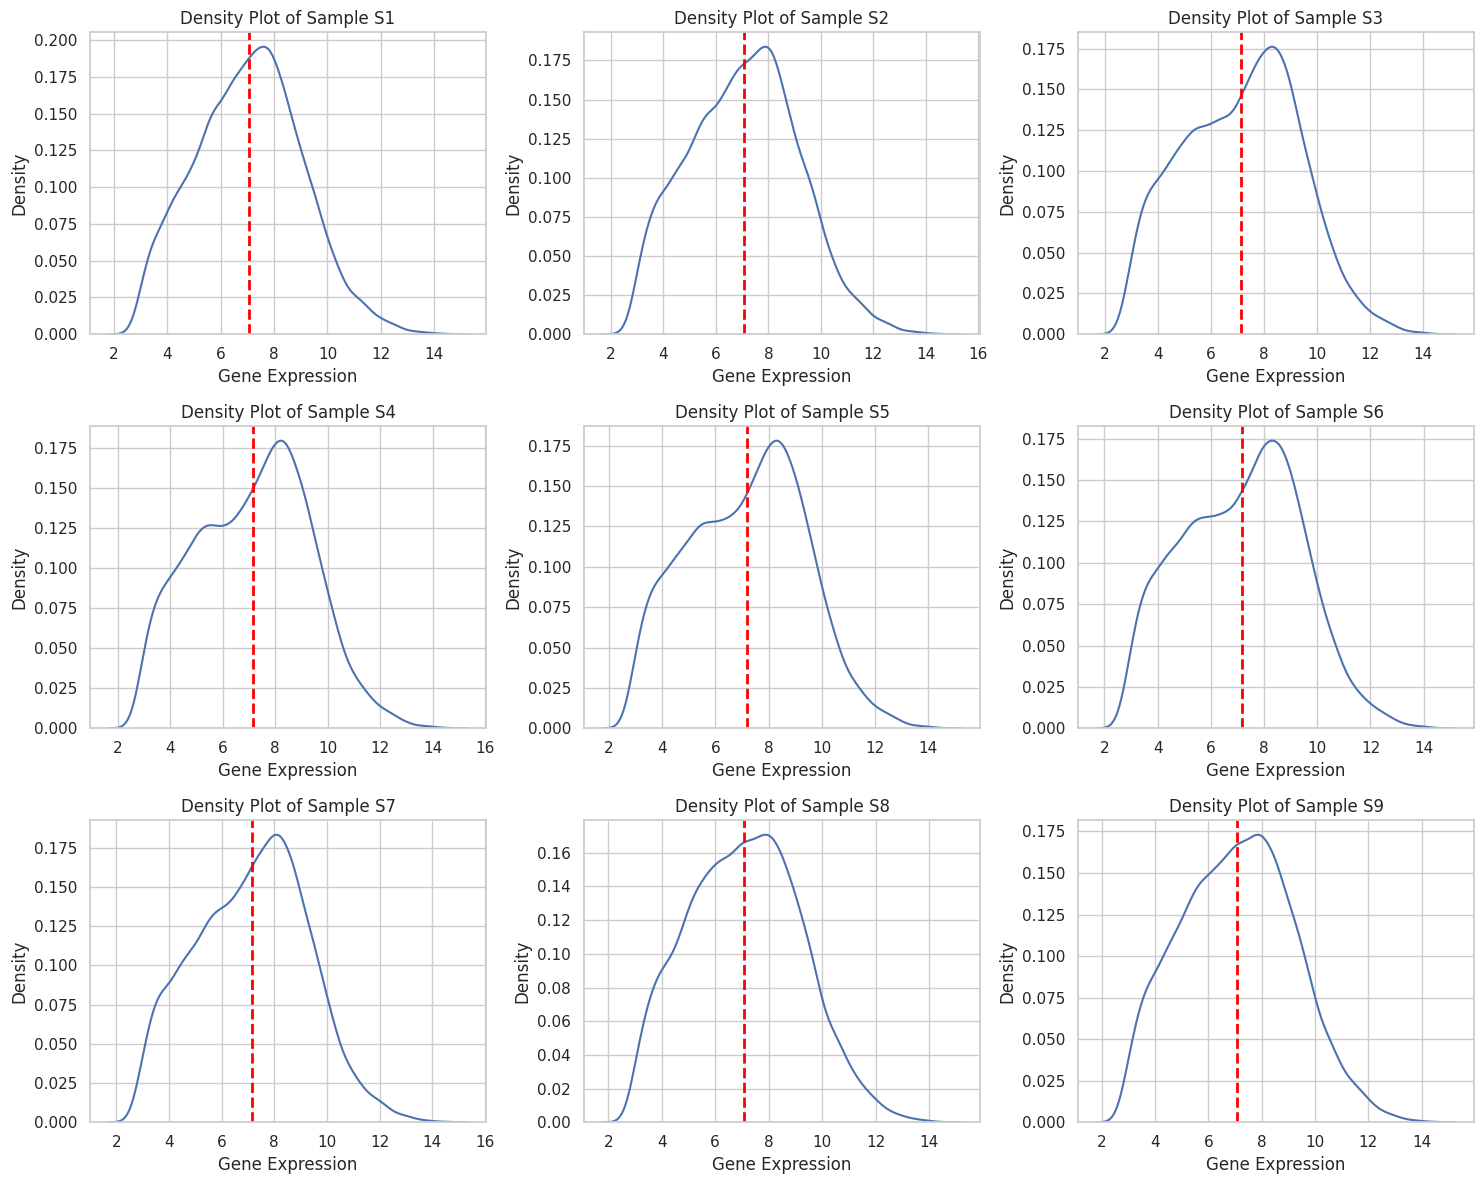

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density_for_samples(sample_ids, data):
    # Calculating the number of rows and columns for subplots
    num_samples = len(sample_ids)
    num_cols = 3
    num_rows = -(-num_samples // num_cols)

    # Creation of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

    # Flattening the 2D array of subplots to simplify indexing
    axes = axes.flatten()

    # Looping through each sample and plot the density
    for i, sample_id in enumerate(sample_ids):
        ax = axes[i]
        sns.kdeplot(data[sample_id], ax=ax)
        ax.axvline(data[sample_id].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
        ax.set_title(f'Density Plot of Sample {sample_id}')
        ax.set_xlabel('Gene Expression')
        ax.set_ylabel('Density')

    # Adjusting layout for better spacing
    plt.tight_layout()
    plt.show()


sample_ids_to_plot = input_data.columns[2:11]
plot_density_for_samples(sample_ids_to_plot, input_data)


In [ ]:
import pandas as pd

def skewness_kurtosis_summary(sample_ids, data, skewness_threshold=0.5):
    summary_data = {'Sample ID': [], 'Skewness': [], 'Kurtosis': [], 'Skewness Category': []}

    for sample_id in sample_ids:
        expression_data = data[sample_id]
        skewness = expression_data.skew()
        kurtosis = expression_data.kurtosis()

        skewness_category = 'Normal' if abs(skewness) <= skewness_threshold else \
                            'Negatively Skewed' if skewness < 0 else 'Positively Skewed'

        summary_data['Sample ID'].append(sample_id)
        summary_data['Skewness'].append(skewness)
        summary_data['Kurtosis'].append(kurtosis)
        summary_data['Skewness Category'].append(skewness_category)

    summary_df = pd.DataFrame(summary_data)
    return summary_df


sample_ids_to_analyze = input_data.columns[2:]  # Replace with your desired sample IDs
skewness_kurtosis_df = pd.DataFrame(skewness_kurtosis_summary(sample_ids_to_analyze, input_data))

print(skewness_kurtosis_df.drop(columns = ['Skewness Category']))


    Sample ID  Skewness  Kurtosis
0          S1  0.141347 -0.312498
1          S2  0.114966 -0.447299
2          S3  0.033564 -0.647611
3          S4  0.022694 -0.639764
4          S5  0.015898 -0.663871
..        ...       ...       ...
248      S249  0.142946 -0.458228
249      S250  0.082979 -0.654198
250      S251  0.127637 -0.443094
251      S252  0.077882 -0.559903
252      S253  0.124957 -0.454754

[253 rows x 3 columns]


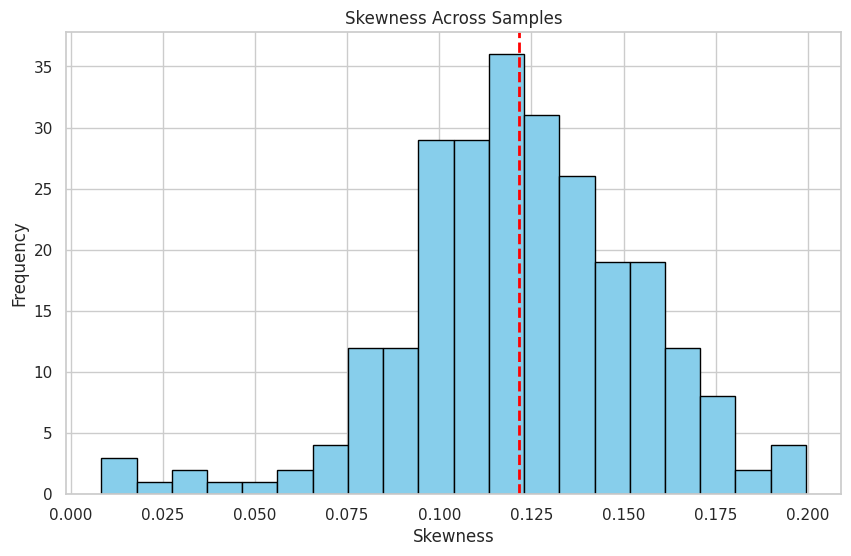

In [ ]:
def plot_skewness_histogram(summary_df):
    plt.figure(figsize=(10, 6))
    plt.hist(summary_df['Skewness'], bins=20, color='skyblue', edgecolor='black')
    plt.axvline(summary_df['Skewness'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.title('Skewness Across Samples')
    plt.xlabel('Skewness')
    plt.ylabel('Frequency')
    plt.show()

plot_skewness_histogram(skewness_kurtosis_df)

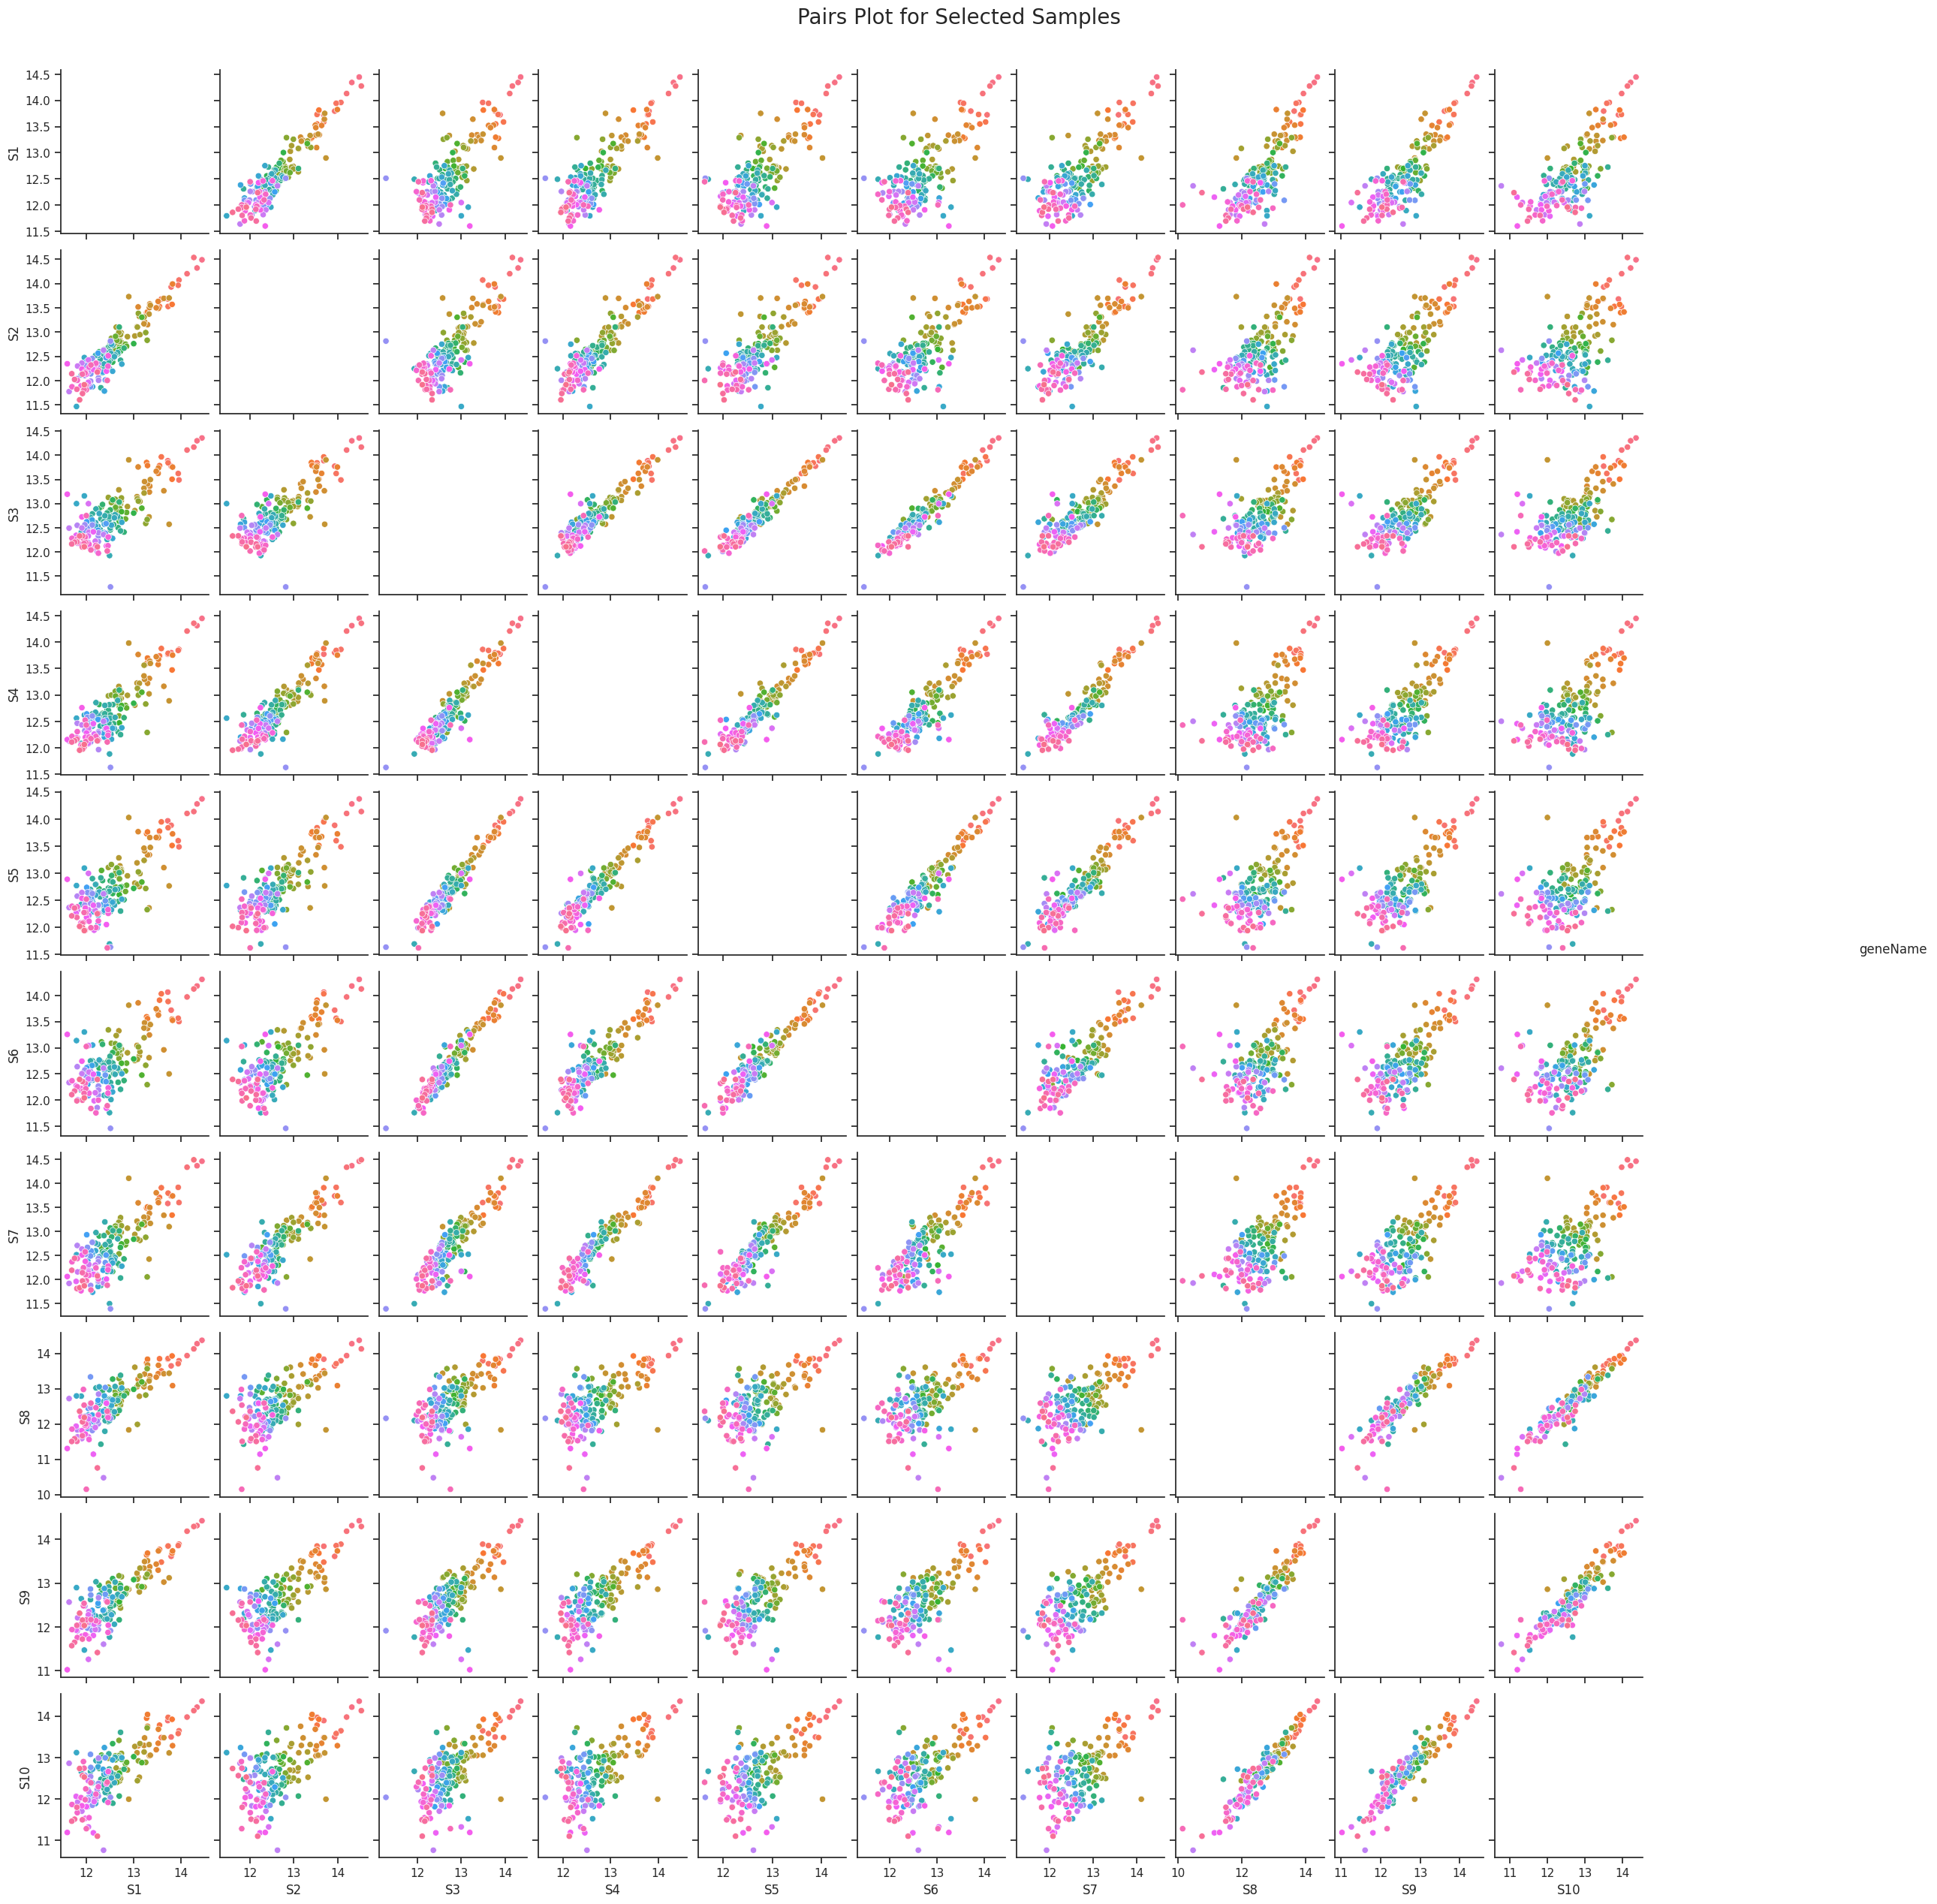

In [ ]:
def plot_pairs_plot(sample_ids, data):
    # Selection of the relevant columns based on the sample IDs
    selected_data = data[['geneName'] + sample_ids][:180]

    # Creating a pairs plot using Seaborn
    sns.set(style="ticks")
    pairs_plot = sns.pairplot(selected_data, hue='geneName', palette='husl', height=2.5,plot_kws={'legend': False})

    # Adjusting layout
    pairs_plot.fig.suptitle('Pairs Plot for Selected Samples', y=1.02,fontsize = 20)

    # Adjusting legend size and position
    pairs_plot.fig.subplots_adjust(right=0.85)

    plt.show()


sample_ids_to_plot = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10']  # Replace with your desired sample IDs
plot_pairs_plot(sample_ids_to_plot, input_data)


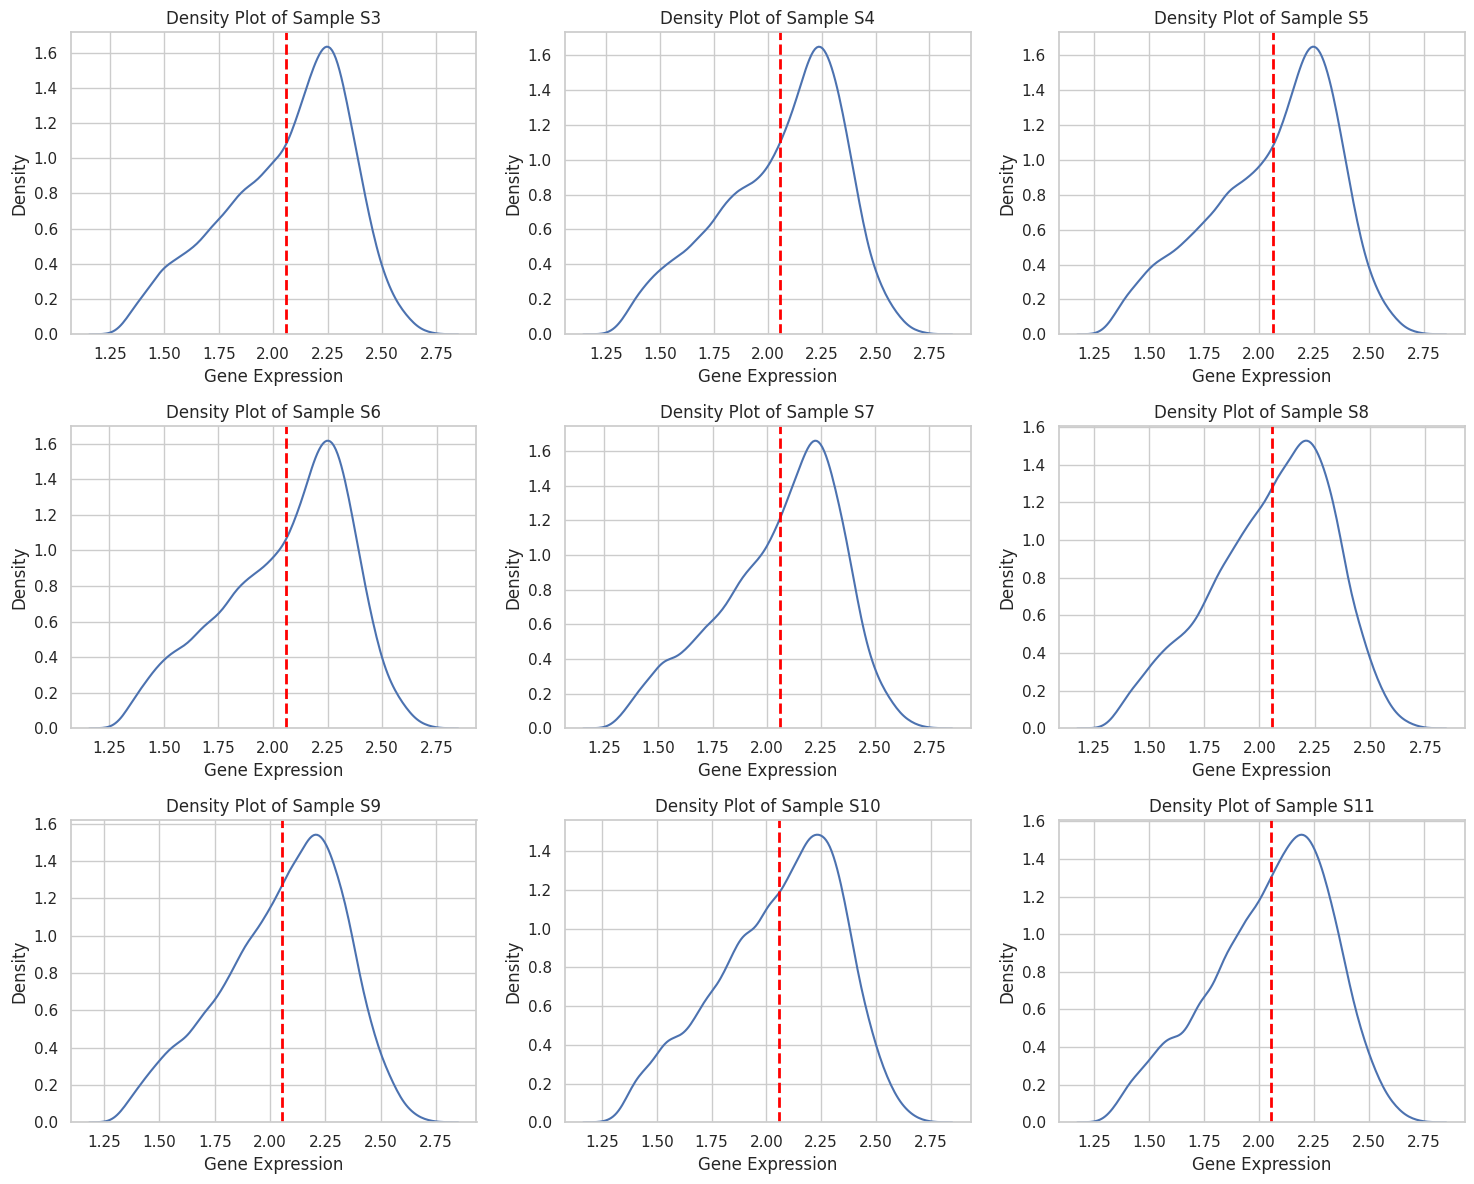

In [ ]:
# Log transformation of the gene expression data
log_transformed_data = np.log1p(input_data.iloc[:, 2:])
sns.set_style('whitegrid')

sample_ids_to_plot = log_transformed_data.columns[2:11]
plot_density_for_samples(sample_ids_to_plot, log_transformed_data)

In [ ]:
def pearson_correlation_with_pvalues(data):
    num_samples = data.shape[1]
    corr_matrix = np.zeros((num_samples, num_samples))
    pvalue_matrix = np.zeros((num_samples, num_samples))

    for i in range(num_samples):
        for j in range(num_samples):
            corr, p_value = pearsonr(data.iloc[:, i], data.iloc[:, j])
            corr_matrix[i, j] = corr
            pvalue_matrix[i, j] = p_value

    corr_df = pd.DataFrame(corr_matrix, index=data.columns, columns=data.columns)
    pvalue_df = pd.DataFrame(pvalue_matrix, index=data.columns, columns=data.columns)

    return corr_df, pvalue_df

log_transformed_data = np.log1p(input_data.iloc[:, 2:])
pearson_corr, pvalues = pearson_correlation_with_pvalues(log_transformed_data)

In [ ]:
pearson_corr

S1        S2        S3        S4        S5        S6        S7  \
S1    1.000000  0.989097  0.962610  0.964550  0.962154  0.949866  0.960899   
S2    0.989097  1.000000  0.971164  0.973575  0.971047  0.960031  0.968890   
S3    0.962610  0.971164  1.000000  0.989063  0.991059  0.986407  0.983882   
S4    0.964550  0.973575  0.989063  1.000000  0.991275  0.982006  0.986465   
S5    0.962154  0.971047  0.991059  0.991275  1.000000  0.984417  0.984876   
...        ...       ...       ...       ...       ...       ...       ...   
S249  0.987110  0.985450  0.972986  0.972216  0.973649  0.960493  0.966827   
S250  0.971066  0.977250  0.976964  0.978554  0.976673  0.967002  0.967439   
S251  0.983940  0.987687  0.971617  0.974837  0.974425  0.961389  0.968436   
S252  0.975863  0.975903  0.975276  0.974593  0.976055  0.967340  0.967555   
S253  0.982743  0.980060  0.974780  0.972711  0.974189  0.963805  0.968481   

            S8        S9       S10  ...      S244      S245      S246  \
S1    0.979278  0.977001  0.978841  ...  0.984164  0.986734  0.983325   
S2    0.976228  0.977254  0.975889  ...  0.984422  0.986269  0.985030   
S3    0.966738  0.975695  0.970274  ...  0.973879  0.966093  0.962243   
S4    0.966776  0.976424  0.968959  ...  0.970642  0.967884  0.966048   
S5    0.964958  0.972618  0.968281  ...  0.972233  0.969089  0.966282   
...        ...       ...       ...  ...       ...       ...       ...   
S249  0.983243  0.980644  0.985006  ...  0.992225  0.987672  0.980066   
S250  0.966725  0.972708  0.973157  ...  0.976677  0.970130  0.968766   
S251  0.976311  0.976116  0.977737  ...  0.988373  0.986584  0.983131   
S252  0.981911  0.977739  0.985267  ...  0.985866  0.978029  0.971629   
S253  0.980919  0.979845  0.985075  ...  0.989725  0.984824  0.976581   

          S247      S248      S249      S250      S251      S252      S253  
S1    0.983382  0.972362  0.987110  0.971066  0.983940  0.975863  0.982743  
S2    0.984047  0.976213  0.985450  0.977250  0.987687  0.975903  0.980060  
S3    0.966414  0.971953  0.972986  0.976964  0.971617  0.975276  0.974780  
S4    0.970424  0.973820  0.972216  0.978554  0.974837  0.974593  0.972711  
S5    0.970922  0.970060  0.973649  0.976673  0.974425  0.976055  0.974189  
...        ...       ...       ...       ...       ...       ...       ...  
S249  0.988286  0.974797  1.000000  0.977686  0.990020  0.984468  0.990194  
S250  0.975077  0.988176  0.977686  1.000000  0.980002  0.972881  0.976661  
S251  0.989071  0.977605  0.990020  0.980002  1.000000  0.983314  0.986252  
S252  0.978076  0.967903  0.984468  0.972881  0.983314  1.000000  0.986983  
S253  0.984881  0.975040  0.990194  0.976661  0.986252  0.986983  1.000000  

[253 rows x 253 columns]

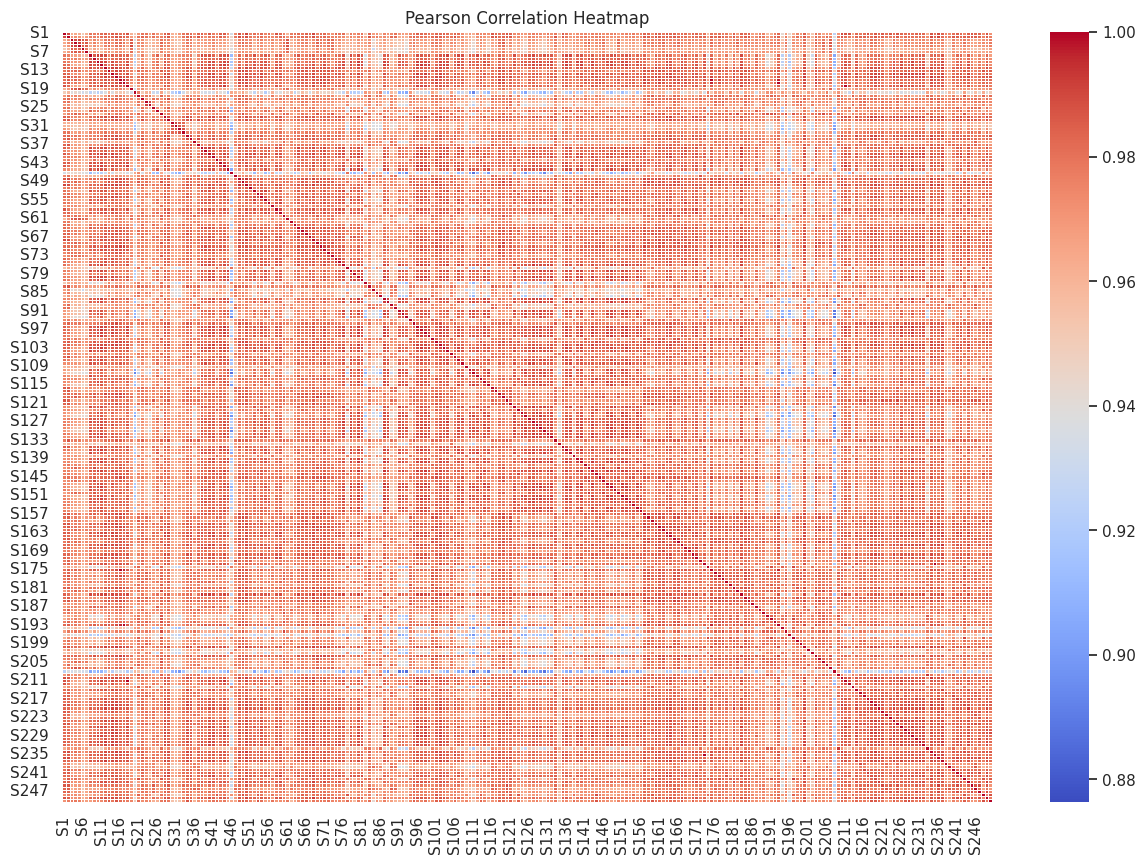

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(pearson_corr.iloc[:250,:250], cmap='coolwarm', annot=False, fmt=".2f",linewidth= 0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [ ]:
def median_normalization(log_transformed_data, sample_ids):
    normalized_data = log_transformed_data.copy()

    for sample_id in sample_ids:
        # Subtracting the median value of each sample from every data point to eliminate the overall shift in distribution
        normalized_data[sample_id] = log_transformed_data[sample_id] - log_transformed_data[sample_id].median()

    return normalized_data

normalized_data = median_normalization(log_transformed_data, log_transformed_data.columns)
normalized_data

S1        S2        S3        S4        S5        S6        S7  \
0      0.645903  0.647298  0.615652  0.622131  0.611634  0.611909  0.627328   
1      0.639125  0.636356  0.611856  0.613290  0.605536  0.603559  0.621238   
2      0.634690  0.650355  0.603240  0.616182  0.596276  0.599856  0.629275   
3      0.625272  0.628592  0.599243  0.606515  0.594005  0.589641  0.619228   
4      0.598017  0.593767  0.584440  0.577413  0.584945  0.595813  0.568741   
...         ...       ...       ...       ...       ...       ...       ...   
20859 -0.777441 -0.793778 -0.778479 -0.821022 -0.795041 -0.790715 -0.773819   
20860 -0.733377 -0.772448 -0.797054 -0.780145 -0.784187 -0.781461 -0.806482   
20861 -0.719321 -0.788412 -0.840296 -0.820153 -0.801023 -0.797637 -0.810136   
20862 -0.748480 -0.802079 -0.787196 -0.813732 -0.811336 -0.816091 -0.774543   
20863 -0.734193 -0.750553 -0.818413 -0.853080 -0.828253 -0.813665 -0.843290   

             S8        S9       S10  ...      S244      S245      S246  \
0      0.640623  0.641564  0.634185  ...  0.646523  0.644255  0.638691   
1      0.634271  0.634346  0.624814  ...  0.636305  0.638811  0.633474   
2      0.624613  0.633037  0.619253  ...  0.636470  0.633605  0.633706   
3      0.611884  0.625915  0.608964  ...  0.622636  0.626335  0.621563   
4      0.605179  0.603059  0.603271  ...  0.612238  0.593556  0.583196   
...         ...       ...       ...  ...       ...       ...       ...   
20859 -0.749838 -0.769683 -0.798559  ... -0.776455 -0.800605 -0.708532   
20860 -0.711468 -0.764335 -0.781460  ... -0.723833 -0.773936 -0.737092   
20861 -0.745286 -0.788800 -0.770417  ... -0.742687 -0.757543 -0.716335   
20862 -0.756320 -0.767577 -0.788734  ... -0.708730 -0.744575 -0.782255   
20863 -0.767576 -0.788800 -0.768833  ... -0.771755 -0.779787 -0.823875   

           S247      S248      S249      S250      S251      S252      S253  
0      0.641822  0.635261  0.647526  0.635499  0.646744  0.619949  0.642986  
1      0.636157  0.617330  0.636888  0.618079  0.633840  0.610692  0.633856  
2      0.639032  0.608383  0.635410  0.615082  0.635842  0.598192  0.633954  
3      0.627124  0.604291  0.629969  0.588685  0.620476  0.589885  0.614182  
4      0.598496  0.606778  0.612744  0.595914  0.599419  0.604875  0.603738  
...         ...       ...       ...       ...       ...       ...       ...  
20859 -0.735206 -0.749892 -0.771418 -0.773088 -0.767720 -0.768506 -0.760583  
20860 -0.766073 -0.763134 -0.769238 -0.725042 -0.740729 -0.760277 -0.808406  
20861 -0.764391 -0.766282 -0.767374 -0.758463 -0.714355 -0.819271 -0.768928  
20862 -0.778617 -0.787419 -0.788752 -0.765465 -0.699123 -0.754562 -0.733672  
20863 -0.753767 -0.776999 -0.753605 -0.803174 -0.781163 -0.806121 -0.768450  

[20864 rows x 253 columns]

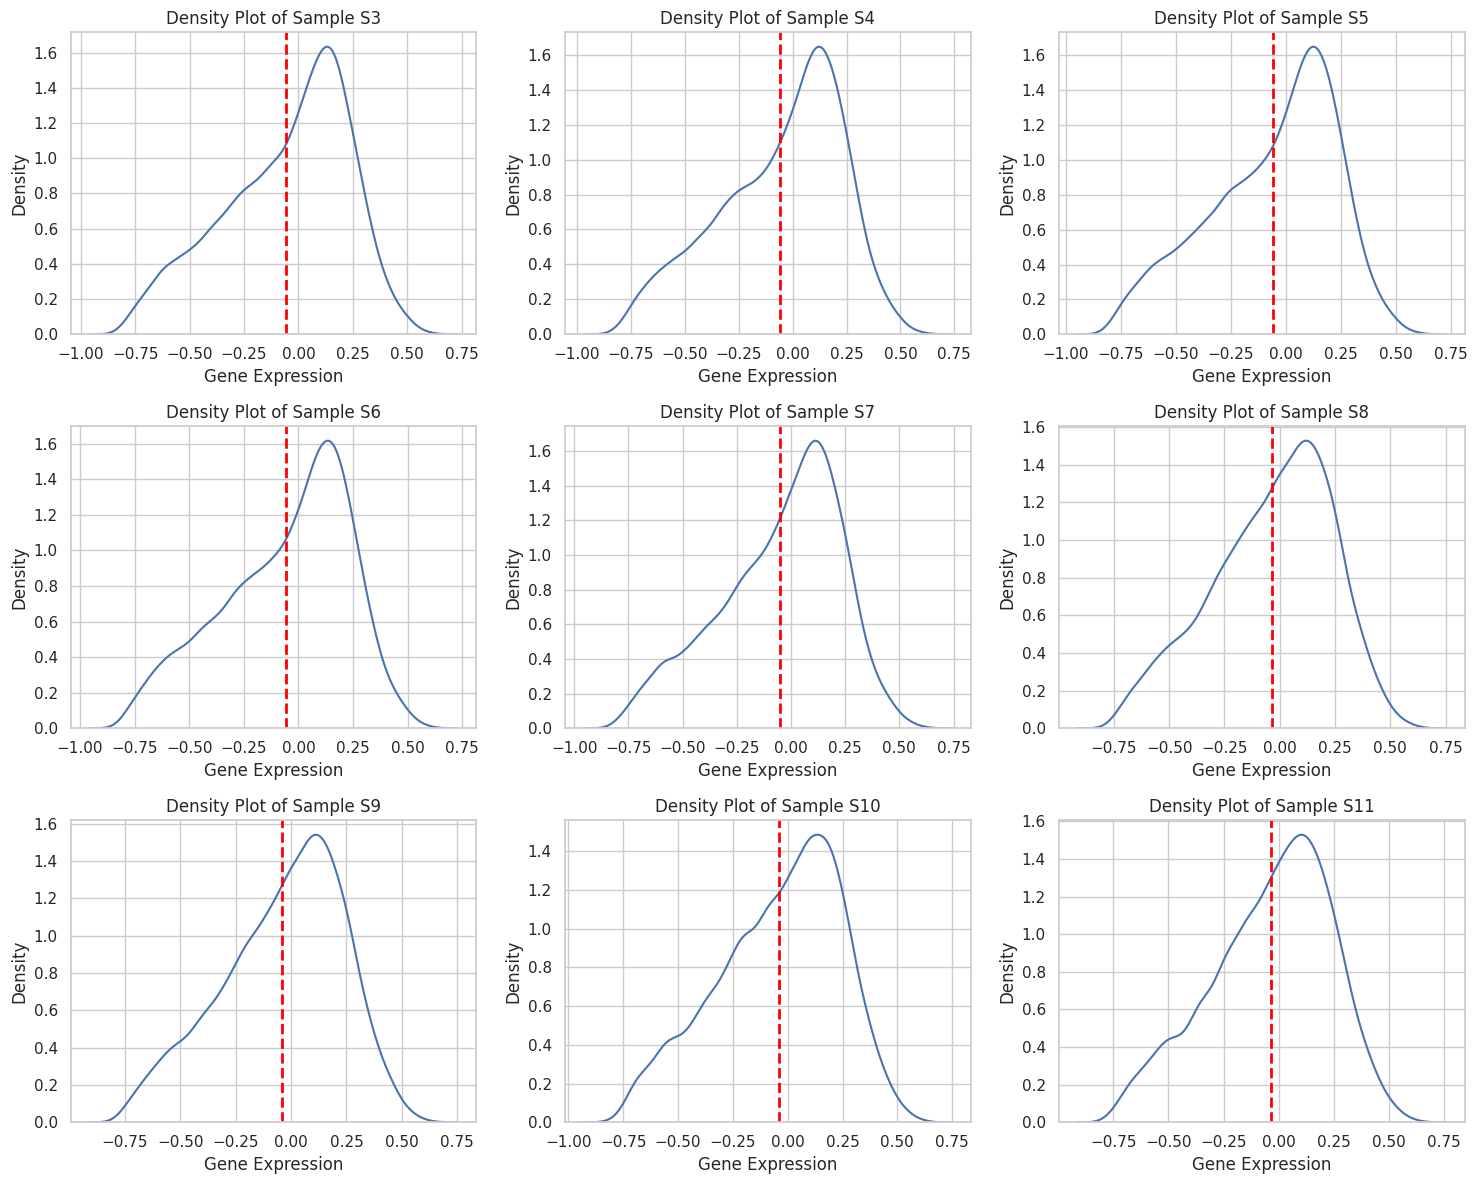

In [ ]:
sample_ids_to_plot = normalized_data.columns[2:11]
plot_density_for_samples(sample_ids_to_plot, normalized_data)

<ipython-input-24-a218f662109d>:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_value = normalized_data[sample_id].mad()


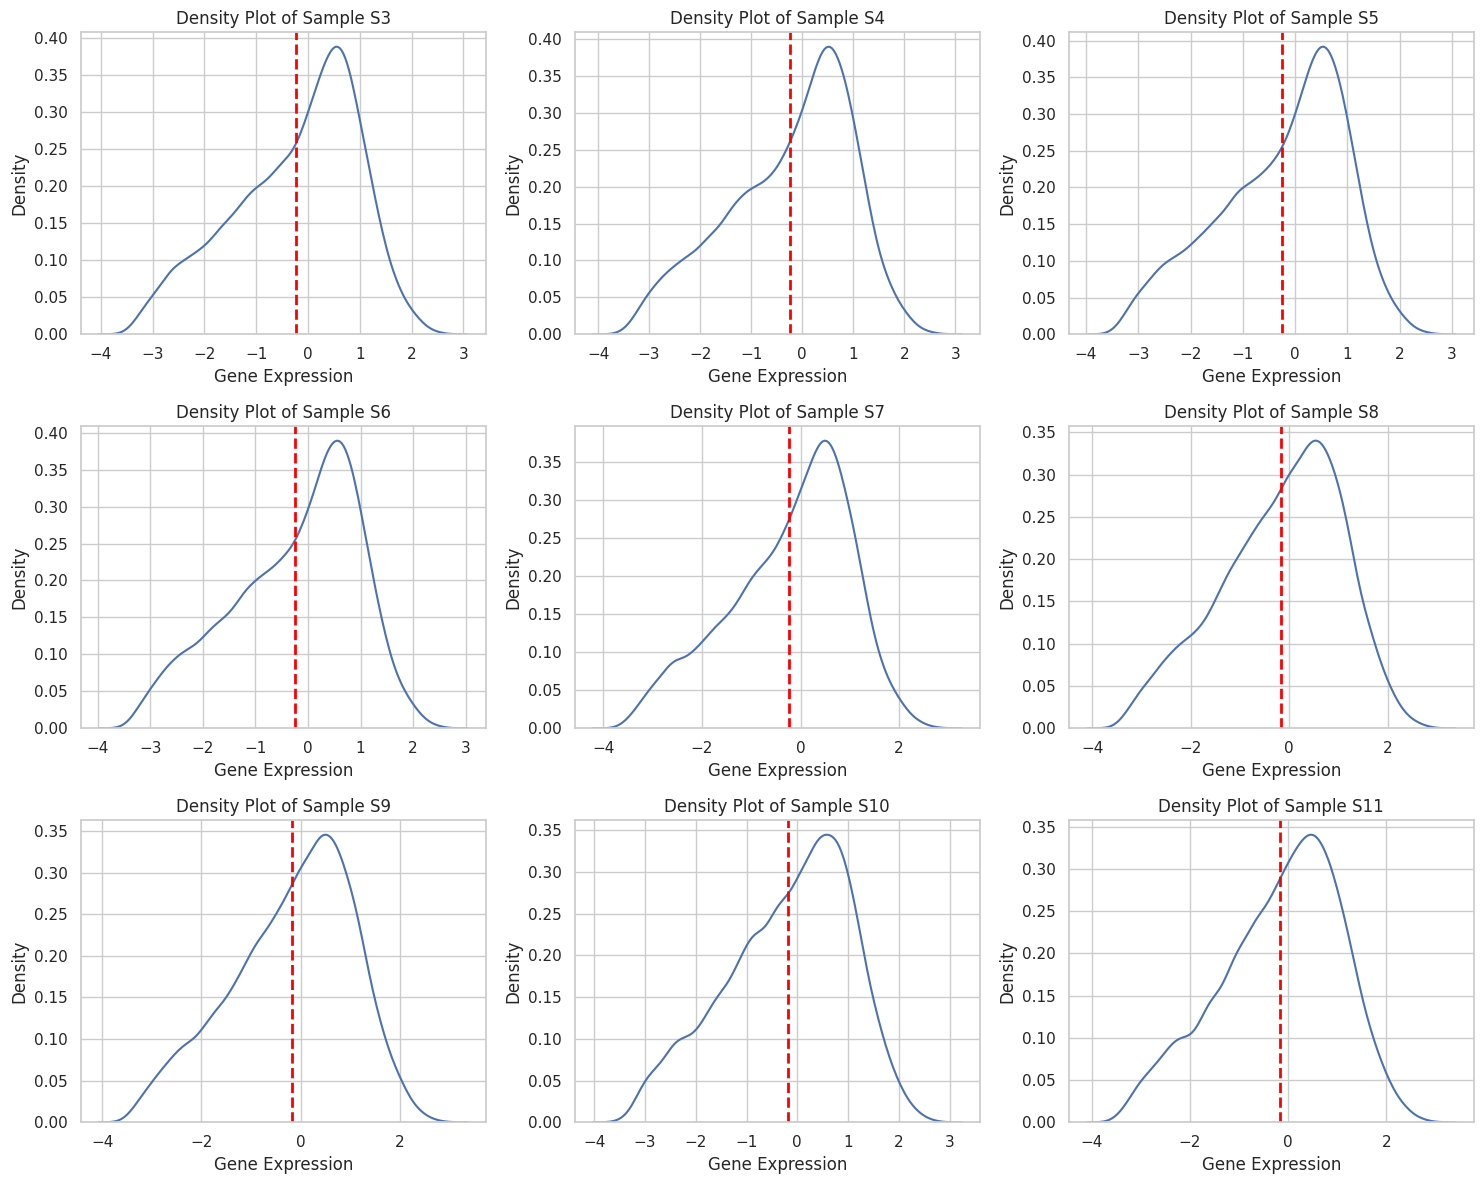

In [ ]:
def mad_scaling(normalized_data, sample_ids):
    scaled_data = normalized_data.copy()

    for sample_id in sample_ids:
        # Calculate the median absolute deviation (MAD)
        mad_value = normalized_data[sample_id].mad()

        # Scale each data point by dividing it by the MAD
        scaled_data[sample_id] = normalized_data[sample_id] / mad_value

    return scaled_data

scaled_data = mad_scaling(normalized_data, normalized_data.columns)
sample_ids_to_plot = scaled_data.columns[2:11]
plot_density_for_samples(sample_ids_to_plot, scaled_data)

In [ ]:
scaled_data['geneName'] = input_data['geneName']
scaled_data

<ipython-input-25-4f9daa3dbda1>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_data['geneName'] = input_data['geneName']


S1        S2        S3        S4        S5        S6        S7  \
0      3.088177  2.916132  2.585773  2.627671  2.574401  2.541932  2.758338   
1      3.055770  2.866834  2.569830  2.590329  2.548732  2.507246  2.731561   
2      3.034562  2.929905  2.533639  2.602546  2.509757  2.491864  2.766896   
3      2.989535  2.831859  2.516853  2.561716  2.500195  2.449427  2.722722   
4      2.859221  2.674970  2.454681  2.438800  2.462063  2.475069  2.500734   
...         ...       ...       ...       ...       ...       ...       ...   
20859 -3.717080 -3.576034 -3.269654 -3.467722 -3.346370 -3.284711 -3.402451   
20860 -3.506402 -3.479941 -3.347670 -3.295069 -3.300683 -3.246267 -3.546070   
20861 -3.439201 -3.551860 -3.529289 -3.464052 -3.371547 -3.313465 -3.562136   
20862 -3.578615 -3.613434 -3.306267 -3.436931 -3.414956 -3.390125 -3.405634   
20863 -3.510304 -3.381304 -3.437377 -3.603123 -3.486159 -3.380049 -3.707913   

             S8        S9       S10  ...      S245      S246      S247  \
0      2.877882  2.861784  2.737109  ...  2.944826  3.004599  2.882093   
1      2.849347  2.829583  2.696661  ...  2.919939  2.980054  2.856653   
2      2.805960  2.823744  2.672660  ...  2.896142  2.981149  2.869562   
3      2.748779  2.791979  2.628252  ...  2.862915  2.924021  2.816091   
4      2.718655  2.690024  2.603683  ...  2.713085  2.743530  2.687539   
...         ...       ...       ...  ...       ...       ...       ...   
20859 -3.368513 -3.433275 -3.446535  ... -3.659486 -3.333149 -3.301432   
20860 -3.196141 -3.409420 -3.372736  ... -3.537581 -3.467508 -3.440039   
20861 -3.348062 -3.518550 -3.325076  ... -3.462652 -3.369862 -3.432485   
20862 -3.397632 -3.423879 -3.404131  ... -3.403377 -3.679967 -3.496368   
20863 -3.448195 -3.518550 -3.318241  ... -3.564325 -3.875761 -3.384778   

           S248      S249      S250      S251      S252      S253   geneName  
0      2.812312  2.906998  2.661667  2.906648  2.710178  2.880039        ND4  
1      2.732931  2.859241  2.588705  2.848652  2.669707  2.839145       COX2  
2      2.693325  2.852606  2.576156  2.857649  2.615063  2.839585       ATP6  
3      2.675206  2.828178  2.465596  2.788590  2.578750  2.751024       COX1  
4      2.686217  2.750849  2.495874  2.693955  2.644278  2.704242        UBC  
...         ...       ...       ...       ...       ...       ...        ...  
20859 -3.319787 -3.463201 -3.237933 -3.450346 -3.359610 -3.406778  LINC02297  
20860 -3.378410 -3.453411 -3.036700 -3.329042 -3.323635 -3.620986  LINC01527  
20861 -3.392347 -3.445042 -3.176680 -3.210508 -3.581537 -3.444155      TECRL  
20862 -3.485919 -3.541020 -3.206003 -3.142052 -3.298650 -3.286239     ZNF750  
20863 -3.439788 -3.383228 -3.363940 -3.510762 -3.524046 -3.442017     CLCA3P  

[20864 rows x 254 columns]

In [ ]:


def perform_gene_pca(scaled_data, n_components=5):
    # Transpose the DataFrame so that each row is a gene
    transposed_data = scaled_data.set_index('geneName').T

    pca_list = []
    feature_weight_list = []

    for n in range(1, n_components + 1):
        PCAmod = PCA(n_components=n)
        PCAmod.fit(transposed_data)

        pca_list.append(pd.Series({
            'n': n,
            'model': PCAmod,
            'var': PCAmod.explained_variance_ratio_.sum()
        }))

        weights = PCAmod.explained_variance_ratio_.reshape(-1, 1) / PCAmod.explained_variance_ratio_.sum()
        overall_contributions = np.abs(PCAmod.components_) * weights
        abs_feature_values = overall_contributions.sum(axis=0)
        feature_weight_list.append(pd.DataFrame({
            'n': n,
            'features': transposed_data.columns,
            'values': abs_feature_values / abs_feature_values.sum(),
        }))

    pca_report = pd.concat(pca_list, axis=1).T.set_index('n')
    feature_importance_report = pd.concat(feature_weight_list).pivot(index='n', columns='features', values='values')

    return pca_report, feature_importance_report

# Example usage:
n_components = 200  # You can adjust the number of components as needed
gene_pca_report, gene_feature_importance_report = perform_gene_pca(scaled_data, n_components)


In [ ]:
gene_pca_report

model       var
n                                   
1      PCA(n_components=1)  0.298964
2      PCA(n_components=2)  0.383005
3      PCA(n_components=3)   0.44517
4      PCA(n_components=4)  0.494244
5      PCA(n_components=5)  0.530447
..                     ...       ...
196  PCA(n_components=196)  0.975863
197  PCA(n_components=197)  0.976354
198  PCA(n_components=198)  0.976912
199  PCA(n_components=199)  0.977409
200  PCA(n_components=200)  0.977883

[200 rows x 2 columns]

In [ ]:
gene_feature_importance_report

features      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1  \
n                                                                      
1         0.000009  0.000043  0.000012  0.000089  0.000106  0.000066   
2         0.000019  0.000046  0.000017  0.000076  0.000081  0.000069   
3         0.000018  0.000043  0.000019  0.000073  0.000092  0.000066   
4         0.000022  0.000039  0.000027  0.000067  0.000085  0.000061   
5         0.000025  0.000041  0.000031  0.000063  0.000079  0.000059   
..             ...       ...       ...       ...       ...       ...   
196       0.000033  0.000047  0.000036  0.000065  0.000074  0.000067   
197       0.000033  0.000048  0.000036  0.000065  0.000074  0.000067   
198       0.000033  0.000047  0.000036  0.000064  0.000074  0.000067   
199       0.000033  0.000047  0.000036  0.000065  0.000074  0.000067   
200       0.000033  0.000048  0.000036  0.000065  0.000074  0.000067   

features     A2MP1    A4GALT     A4GNT      AA06  ...    ZWILCH     ZWINT  \
n                                                 ...                       
1         0.000007  0.000007  0.000012  0.000009  ...  0.000137  0.000067   
2         0.000007  0.000026  0.000013  0.000014  ...  0.000128  0.000093   
3         0.000007  0.000024  0.000012  0.000013  ...  0.000118  0.000095   
4         0.000018  0.000027  0.000015  0.000018  ...  0.000106  0.000091   
5         0.000022  0.000028  0.000017  0.000018  ...  0.000104  0.000086   
..             ...       ...       ...       ...  ...       ...       ...   
196       0.000031  0.000027  0.000025  0.000025  ...  0.000086  0.000096   
197       0.000031  0.000027  0.000025  0.000026  ...  0.000086  0.000096   
198       0.000031  0.000028  0.000025  0.000025  ...  0.000086  0.000096   
199       0.000031  0.000027  0.000025  0.000025  ...  0.000086  0.000096   
200       0.000031  0.000027  0.000025  0.000025  ...  0.000086  0.000096   

features      ZXDA      ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX  \
n                                                                      
1         0.000011  0.000055  0.000084  0.000005  0.000086  0.000032   
2         0.000027  0.000060  0.000078  0.000012  0.000070  0.000047   
3         0.000024  0.000059  0.000077  0.000011  0.000062  0.000053   
4         0.000021  0.000063  0.000072  0.000018  0.000059  0.000052   
5         0.000021  0.000062  0.000074  0.000017  0.000060  0.000048   
..             ...       ...       ...       ...       ...       ...   
196       0.000032  0.000049  0.000055  0.000022  0.000045  0.000044   
197       0.000032  0.000049  0.000055  0.000022  0.000045  0.000044   
198       0.000032  0.000049  0.000055  0.000022  0.000045  0.000045   
199       0.000032  0.000049  0.000055  0.000022  0.000045  0.000045   
200       0.000032  0.000049  0.000055  0.000022  0.000045  0.000044   

features     ZZEF1      ZZZ3  
n                             
1         0.000018  0.000048  
2         0.000016  0.000056  
3         0.000022  0.000057  
4         0.000024  0.000054  
5         0.000024  0.000054  
..             ...       ...  
196       0.000029  0.000044  
197       0.000029  0.000044  
198       0.000029  0.000044  
199       0.000029  0.000044  
200       0.000029  0.000044  

[200 rows x 20864 columns]

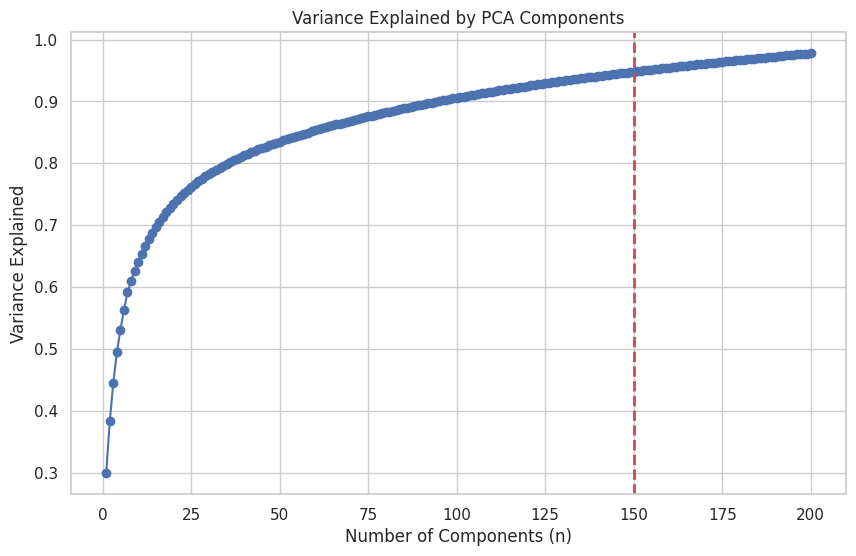

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gene_pca_report.index, gene_pca_report['var'], marker='o', linestyle='-', color='b')
plt.title('Variance Explained by PCA Components')
plt.axvline(x=150, color='r', linestyle='--', linewidth=2, label='Threshold at x=50')
plt.xlabel('Number of Components (n)')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

[Text(0.5, 0, 'Number of components'),
 Text(0, 0.5, 'Relative Importance'),
 Text(0.5, 1.0, 'Feature Importance Vs Dimensions')]

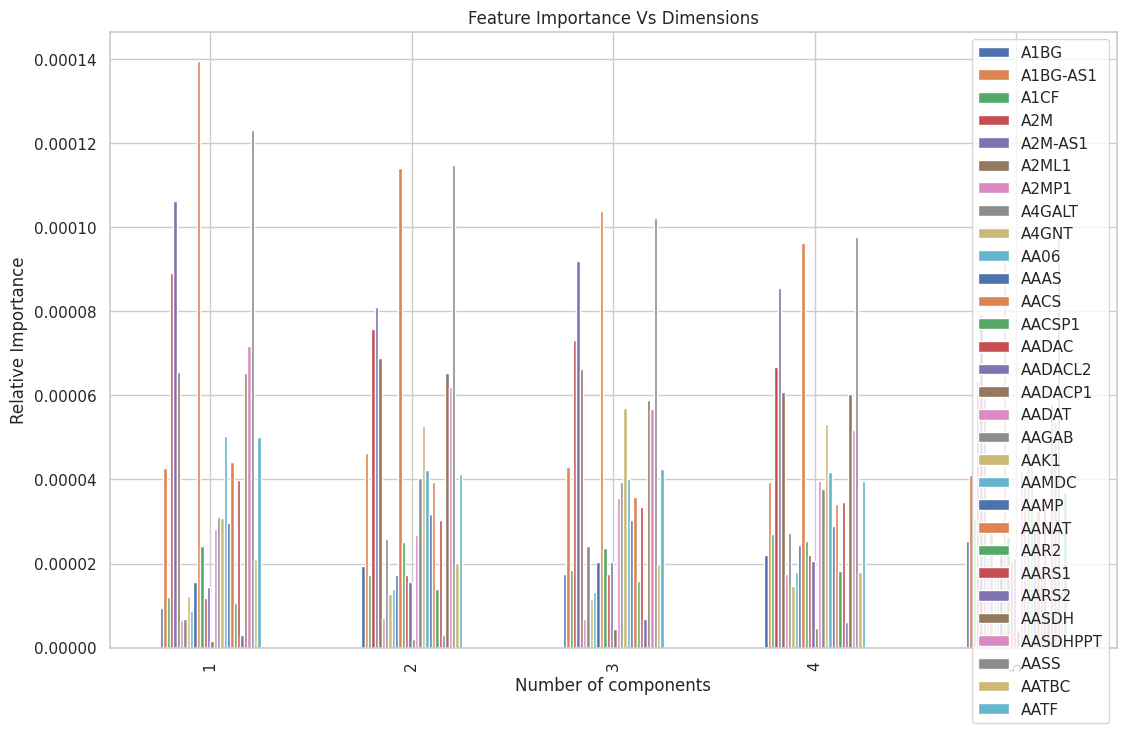

In [ ]:
ax = gene_feature_importance_report .iloc[:5,:30].plot(kind = 'bar' , figsize = (13,8))
ax.legend(loc = 'upper right')
ax.set(xlabel = 'Number of components' ,  ylabel = 'Relative Importance' , title = 'Feature Importance Vs Dimensions')


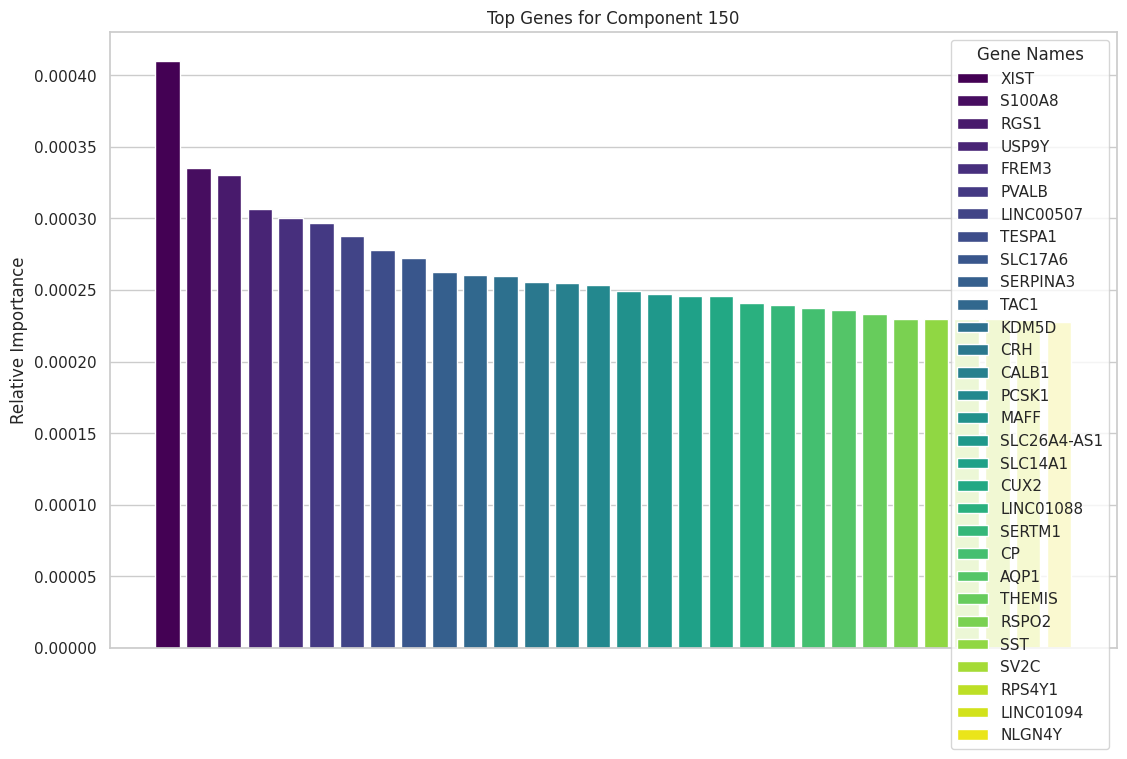

In [ ]:

n_top_genes = 30  # Number of top genes to display

# Get the top genes for the 150th component
top_genes_150th_component = gene_feature_importance_report.iloc[150].nlargest(n_top_genes)

# Plot the top genes for the 150th component
fig, ax = plt.subplots(figsize=(13, 8))

# Plot each bar with a unique color
for idx, (gene, importance) in enumerate(top_genes_150th_component.items()):
    ax.bar(idx, importance, label=gene, color=plt.cm.viridis(idx / len(top_genes_150th_component)))

# Remove x-axis ticks
ax.set_xticks([])

# Display legend with gene names
ax.legend(loc='upper right', title='Gene Names')

ax.set(ylabel='Relative Importance', title='Top Genes for Component 150')
plt.show()




In [ ]:
group_1 = []
group_2 = []

for index, row in meta_data.iterrows():
    if row['groupI'] == 1:
        group_1.append(row['sampleId'])
    else:
        group_2.append(row['sampleId'])

print("Group 1:", group_1)
print("Group 2:", group_2)

Group 1: ['S174', 'S175', 'S176', 'S177', 'S178', 'S179', 'S180', 'S181', 'S182', 'S183', 'S184', 'S185', 'S186', 'S187', 'S188', 'S189', 'S190', 'S191', 'S192', 'S193', 'S194', 'S195', 'S196', 'S197', 'S198', 'S199', 'S200', 'S201', 'S202', 'S203', 'S204', 'S205', 'S206', 'S207', 'S208', 'S209', 'S210', 'S211', 'S212', 'S213', 'S214', 'S215', 'S216', 'S217', 'S218', 'S219', 'S220', 'S221', 'S222', 'S223', 'S224', 'S225', 'S226', 'S227', 'S228', 'S229', 'S230', 'S231', 'S232', 'S233', 'S234', 'S235', 'S236', 'S237', 'S238', 'S239', 'S240', 'S241', 'S242', 'S243', 'S244', 'S245', 'S246', 'S247', 'S248', 'S249', 'S250', 'S251', 'S252', 'S253']
Group 2: ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S50',

In [ ]:
scaled_data

S1        S2        S3        S4        S5        S6        S7  \
0      3.088177  2.916132  2.585773  2.627671  2.574401  2.541932  2.758338   
1      3.055770  2.866834  2.569830  2.590329  2.548732  2.507246  2.731561   
2      3.034562  2.929905  2.533639  2.602546  2.509757  2.491864  2.766896   
3      2.989535  2.831859  2.516853  2.561716  2.500195  2.449427  2.722722   
4      2.859221  2.674970  2.454681  2.438800  2.462063  2.475069  2.500734   
...         ...       ...       ...       ...       ...       ...       ...   
20859 -3.717080 -3.576034 -3.269654 -3.467722 -3.346370 -3.284711 -3.402451   
20860 -3.506402 -3.479941 -3.347670 -3.295069 -3.300683 -3.246267 -3.546070   
20861 -3.439201 -3.551860 -3.529289 -3.464052 -3.371547 -3.313465 -3.562136   
20862 -3.578615 -3.613434 -3.306267 -3.436931 -3.414956 -3.390125 -3.405634   
20863 -3.510304 -3.381304 -3.437377 -3.603123 -3.486159 -3.380049 -3.707913   

             S8        S9       S10  ...      S245      S246      S247  \
0      2.877882  2.861784  2.737109  ...  2.944826  3.004599  2.882093   
1      2.849347  2.829583  2.696661  ...  2.919939  2.980054  2.856653   
2      2.805960  2.823744  2.672660  ...  2.896142  2.981149  2.869562   
3      2.748779  2.791979  2.628252  ...  2.862915  2.924021  2.816091   
4      2.718655  2.690024  2.603683  ...  2.713085  2.743530  2.687539   
...         ...       ...       ...  ...       ...       ...       ...   
20859 -3.368513 -3.433275 -3.446535  ... -3.659486 -3.333149 -3.301432   
20860 -3.196141 -3.409420 -3.372736  ... -3.537581 -3.467508 -3.440039   
20861 -3.348062 -3.518550 -3.325076  ... -3.462652 -3.369862 -3.432485   
20862 -3.397632 -3.423879 -3.404131  ... -3.403377 -3.679967 -3.496368   
20863 -3.448195 -3.518550 -3.318241  ... -3.564325 -3.875761 -3.384778   

           S248      S249      S250      S251      S252      S253   geneName  
0      2.812312  2.906998  2.661667  2.906648  2.710178  2.880039        ND4  
1      2.732931  2.859241  2.588705  2.848652  2.669707  2.839145       COX2  
2      2.693325  2.852606  2.576156  2.857649  2.615063  2.839585       ATP6  
3      2.675206  2.828178  2.465596  2.788590  2.578750  2.751024       COX1  
4      2.686217  2.750849  2.495874  2.693955  2.644278  2.704242        UBC  
...         ...       ...       ...       ...       ...       ...        ...  
20859 -3.319787 -3.463201 -3.237933 -3.450346 -3.359610 -3.406778  LINC02297  
20860 -3.378410 -3.453411 -3.036700 -3.329042 -3.323635 -3.620986  LINC01527  
20861 -3.392347 -3.445042 -3.176680 -3.210508 -3.581537 -3.444155      TECRL  
20862 -3.485919 -3.541020 -3.206003 -3.142052 -3.298650 -3.286239     ZNF750  
20863 -3.439788 -3.383228 -3.363940 -3.510762 -3.524046 -3.442017     CLCA3P  

[20864 rows x 254 columns]

In [ ]:
def get_gene_stats_for_all_genes(group_1, group_2, expression_data):
    gene_stats_list = []

    for gene_name in expression_data['geneName']:
        # Find the index of the gene
        gene_index = expression_data[expression_data['geneName'] == gene_name].index[0]

        # Extract expression values for the gene and groups
        gene_values_group_1 = expression_data.loc[gene_index, group_1].values.astype(float)
        gene_values_group_2 = expression_data.loc[gene_index, group_2].values.astype(float)

        # Perform t-test
        t_stat, p_value = ttest_ind(gene_values_group_1, gene_values_group_2)

        # Create a data frame with gene expression values
        gene_data = {
            'GeneName': gene_name,
            'SampleID': group_1 + group_2,
            'Expression': list(gene_values_group_1) + list(gene_values_group_2)
        }

        gene_df = pd.DataFrame(gene_data)

        # Append gene stats to the list
        gene_stats_list.append({'GeneName': gene_name, 'TStatistic': t_stat, 'PValue': p_value})

    # Create a data frame with gene statistics
    gene_stats_df = pd.DataFrame(gene_stats_list)

    return gene_stats_df


gene_stats_df = get_gene_stats_for_all_genes(group_1, group_2, scaled_data)

print('Gene Statistics Dataframe:')
print(gene_stats_df.head())



Gene Statistics Dataframe:
  GeneName  TStatistic    PValue
0      ND4    0.419941  0.674888
1     COX2    0.488622  0.625536
2     ATP6    0.841201  0.401036
3     COX1    0.559639  0.576225
4      UBC   -0.287781  0.773752


In [ ]:

# Calculate mean expression for each group
mean_expression_group1 = scaled_data[group_1].mean(axis=1)
mean_expression_group2 = scaled_data[group_2].mean(axis=1)

# Calculate fold change
fold_change = mean_expression_group2 / mean_expression_group1

# Add fold change to the DataFrame
scaled_data['FoldChange'] = fold_change
scaled_data['PValue'] = gene_stats_df['PValue']
scaled_data['TStatistic'] = gene_stats_df['TStatistic']

# Display the DataFrame with fold change
print(scaled_data[['geneName', 'FoldChange','PValue','TStatistic']])

        geneName  FoldChange    PValue  TStatistic
0            ND4    0.997976  0.674888    0.419941
1           COX2    0.997649  0.625536    0.488622
2           ATP6    0.995555  0.401036    0.841201
3           COX1    0.997112  0.576225    0.559639
4            UBC    1.001370  0.773752   -0.287781
...          ...         ...       ...         ...
20859  LINC02297    1.004140  0.453861    0.750160
20860  LINC01527    1.009569  0.109537    1.605974
20861      TECRL    0.997771  0.659347   -0.441340
20862     ZNF750    0.997227  0.585001   -0.546802
20863     CLCA3P    0.995020  0.287917   -1.064961

[20864 rows x 4 columns]


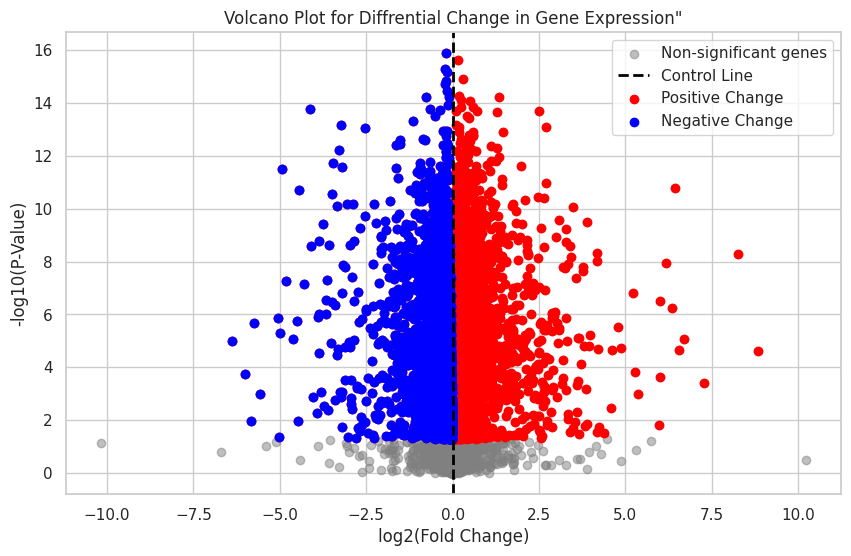

In [ ]:
# Create a volcano plot
plt.figure(figsize=(10, 6))

# Scatter plot with log2(FoldChange)
plt.scatter(np.log2(scaled_data['FoldChange']), -np.log10(scaled_data['PValue']), color='grey', alpha=0.5)

# Highlight significant genes (optional)
significance_threshold = -np.log10(0.05)
significant_genes = scaled_data[scaled_data['PValue'] < 0.05]
plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Control Line')
plt.scatter(np.log2(significant_genes['FoldChange']), -np.log10(significant_genes['PValue']), color='red', label='Positive Fold Change')

# Scatter plot for negative fold change
plt.scatter(np.log2(significant_genes[significant_genes['FoldChange'] < 1]['FoldChange']),
            -np.log10(significant_genes[significant_genes['FoldChange'] < 1]['PValue']),
            color='blue', label='Negative Fold Change')

# Set plot labels and title
plt.title('Volcano Plot for Diffrential Change in Gene Expression"')
plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(P-Value)')

# Add a legend with customized labels
plt.legend(labels={'Non-significant genes' : 'Non significant genes', 'Control Line': 'Control Line','Positive Change': 'Positive','Negative Change': 'Negative'})

# Show the plot
plt.show()
